In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import pickle

In [2]:
data1 = pd.read_csv("liq_taker_CS1_2_1.csv")
data2 = pd.read_csv("liq_taker_CS1_2_2.csv")
data3 = pd.read_csv("liq_taker_CS1_2_3.csv")
data4 = pd.read_csv("liq_taker_CS1_2_4.csv")
data5 = pd.read_csv("liq_taker_CS1_2_5.csv")

In [3]:
data1 = pd.read_csv("liq_taker_CS1_1.csv")
data2 = pd.read_csv("liq_taker_CS1_2.csv")
data3 = pd.read_csv("liq_taker_CS1_3.csv")
data4 = pd.read_csv("liq_taker_CS1_4.csv")
data5 = pd.read_csv("liq_taker_CS1_5.csv")

In [5]:
data = pd.DataFrame()
data["midprice"] = data1['mp']
data['spread'] = data1['sp']
data['returns'] = np.diff(data['midprice']) / data['midprice'][:-1] 

data['bid_volume'] = data1['bid_vol'] 
data['ask_volume'] = data1['ask_vol'] 
data['volume_inbalance'] = np.subtract(data['bid_volume'],data['ask_volume'])

data["act_1"] = data1["act_dir"]
data["act_2"] = data2["act_dir"]
data["act_3"] = data3["act_dir"]
data["act_4"] = data4["act_dir"]
data["act_5"] = data5["act_dir"]
data["act_sum"] = data["act_1"] + data["act_2"] + data["act_3"] + data["act_4"] + data["act_5"]

mov_avg_frame = 50
data["avg_act_1"] = data["act_1"].rolling(mov_avg_frame).mean()
data["avg_act_2"] = data["act_2"].rolling(mov_avg_frame).mean()
data["avg_act_3"] = data["act_3"].rolling(mov_avg_frame).mean()
data["avg_act_4"] = data["act_4"].rolling(mov_avg_frame).mean()
data["avg_act_5"] = data["act_5"].rolling(mov_avg_frame).mean()
data["avg_act_sum"] = data["act_sum"].rolling(mov_avg_frame).mean()

data["rew_1"] = data1["rew"]
data["rew_2"] = data2["rew"]
data["rew_3"] = data3["rew"]
data["rew_4"] = data4["rew"]
data["rew_5"] = data5["rew"]
data["rew_sum"] = data["rew_1"] + data["rew_2"] + data["rew_3"] + data["rew_4"] + data["rew_5"]

with pd.option_context('mode.use_inf_as_null', True):
   data = data.dropna()


Index(['midprice', 'spread', 'returns', 'bid_volume', 'ask_volume',
       'volume_inbalance', 'act_1', 'act_2', 'act_3', 'act_4', 'act_5',
       'act_sum', 'avg_act_1', 'avg_act_2', 'avg_act_3', 'avg_act_4',
       'avg_act_5', 'avg_act_sum', 'rew_1', 'rew_2', 'rew_3', 'rew_4', 'rew_5',
       'rew_sum'],
      dtype='object')


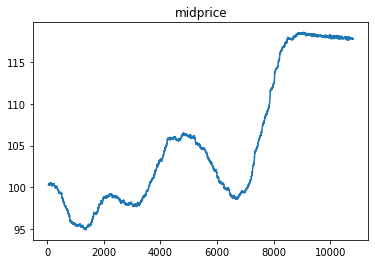

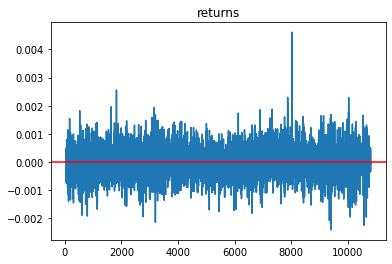

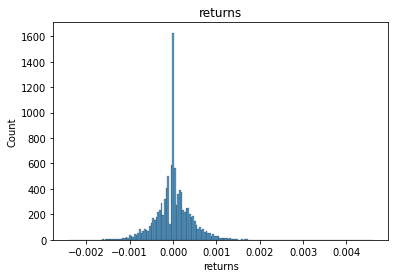

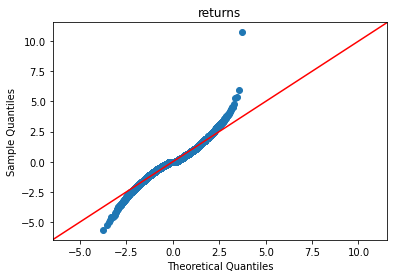

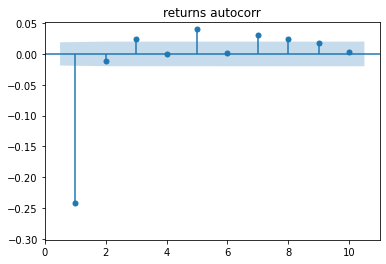

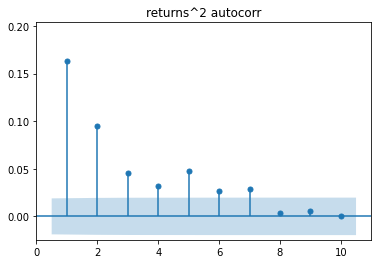

In [17]:
fig = plt.plot(data['midprice'])
plt.title('midprice')
plt.show()
fig = plt.plot(data['returns'])
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title('returns')
plt.show()
sns.histplot(data=data, x="returns")
plt.title('returns')
plt.show()
sm.qqplot(data['returns'], fit=True, line ='45')
plt.title('returns')
plt.show()

statsmodels.graphics.tsaplots.plot_acf(x=data['returns'],lags=np.arange(1,11),alpha=0.05, auto_ylims=True)
plt.title('returns autocorr')
plt.show()
statsmodels.graphics.tsaplots.plot_acf(x=(data['returns']**2),lags=np.arange(1,11),alpha=0.05, auto_ylims=True)
plt.title('returns^2 autocorr')
plt.show()

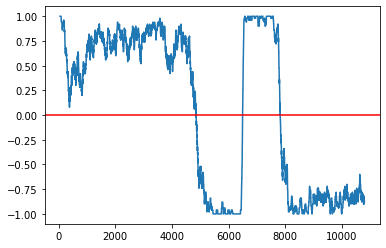

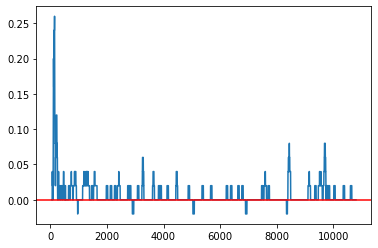

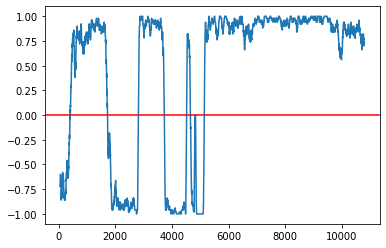

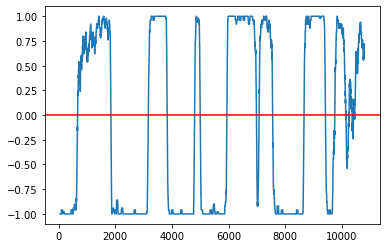

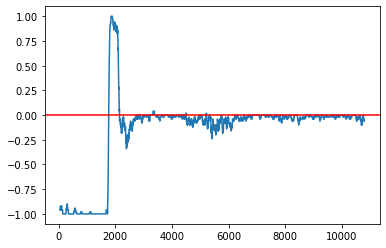

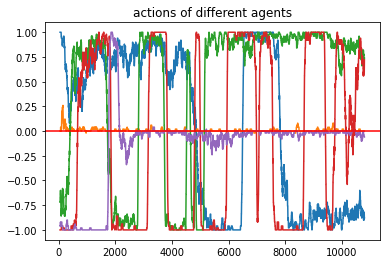

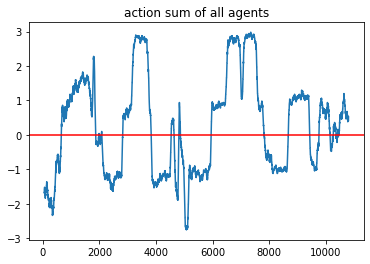

In [18]:
plt.plot(data["avg_act_1"], label="avg_act_1")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()
plt.plot(data["avg_act_2"], label="avg_act_2")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()
plt.plot(data["avg_act_3"], label="avg_act_3")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()
plt.plot(data["avg_act_4"], label="avg_act_4")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()
plt.plot(data["avg_act_5"], label="avg_act_5")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()

plt.plot(data["avg_act_1"], label="avg_act_1")
plt.plot(data["avg_act_2"], label="avg_act_2")
plt.plot(data["avg_act_3"], label="avg_act_3")
plt.plot(data["avg_act_4"], label="avg_act_4")
plt.plot(data["avg_act_5"], label="avg_act_5")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title("actions of different agents")
plt.show()

plt.plot(data["avg_act_sum"])
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title("action sum of all agents")
plt.show()

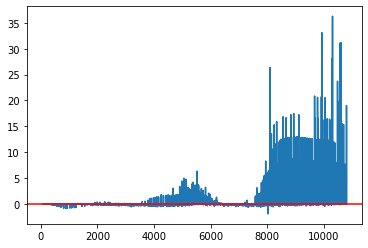

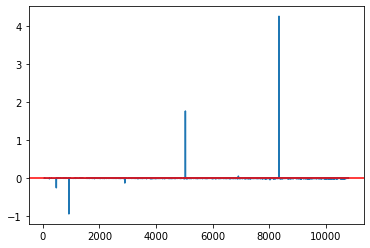

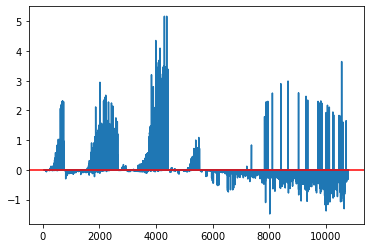

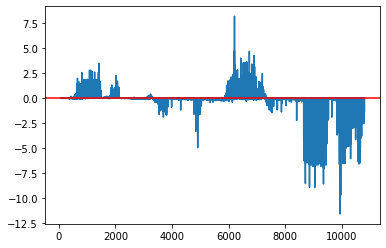

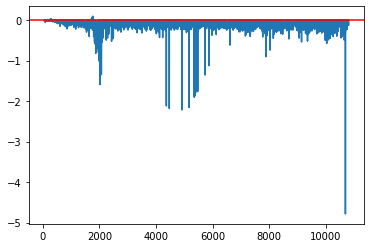

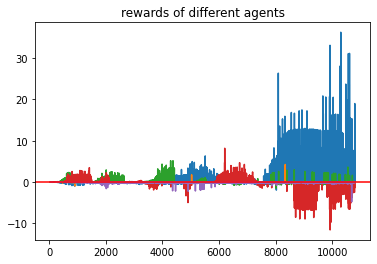

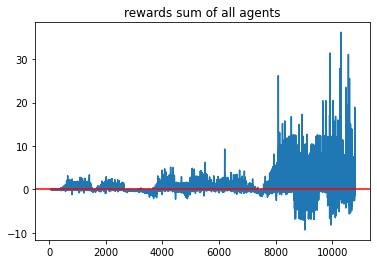

In [19]:
plt.plot(data["rew_1"], label="rew_1")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()
plt.plot(data["rew_2"], label="rew_2")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()
plt.plot(data["rew_3"], label="rew_3")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()
plt.plot(data["rew_4"], label="rew_4")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()
plt.plot(data["rew_5"], label="rew_5")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()

plt.plot(data["rew_1"], label="rew_1")
plt.plot(data["rew_2"], label="rew_2")
plt.plot(data["rew_3"], label="rew_3")
plt.plot(data["rew_4"], label="rew_4")
plt.plot(data["rew_5"], label="rew_5")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title("rewards of different agents")
plt.show()

plt.plot(data["rew_sum"])
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title("rewards sum of all agents")
plt.show()

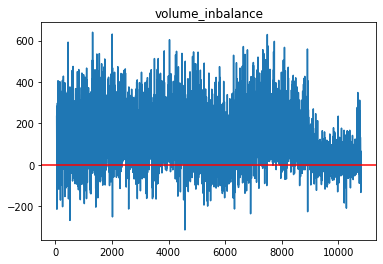

In [20]:
fig = plt.plot(data['volume_inbalance'])
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title('volume_inbalance')
plt.show()

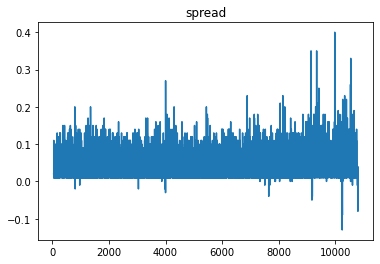

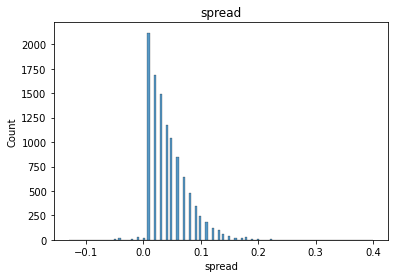

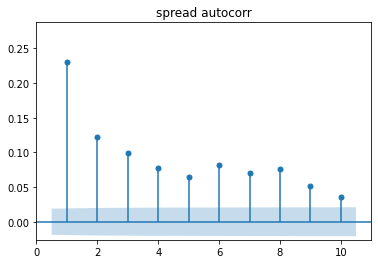

In [21]:
fig = plt.plot(data['spread'])
plt.title('spread')
plt.show()
sns.histplot(data=data, x="spread")
plt.title('spread')
plt.show()
statsmodels.graphics.tsaplots.plot_acf(x=(data['spread']),lags=np.arange(1,11),alpha=0.05, auto_ylims=True)
plt.title('spread autocorr')
plt.show()